In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle
from src.processing.constants import MECHANICS_OF_BIOFILM_PATH

In [4]:
open_stress_file = open(MECHANICS_OF_BIOFILM_PATH / 'arrays from simulation' / 'stress_array.pkl', "rb")
open_positions_file = open(MECHANICS_OF_BIOFILM_PATH / 'arrays from simulation' / 'positions_array.pkl', "rb")

stress_array = pickle.load(open_stress_file)
positions_array = pickle.load(open_positions_file)
open_stress_file.close()
open_positions_file.close()

In [5]:
stress_mag = np.sqrt(stress_array[:,0]**2 + stress_array[:,1]**2)

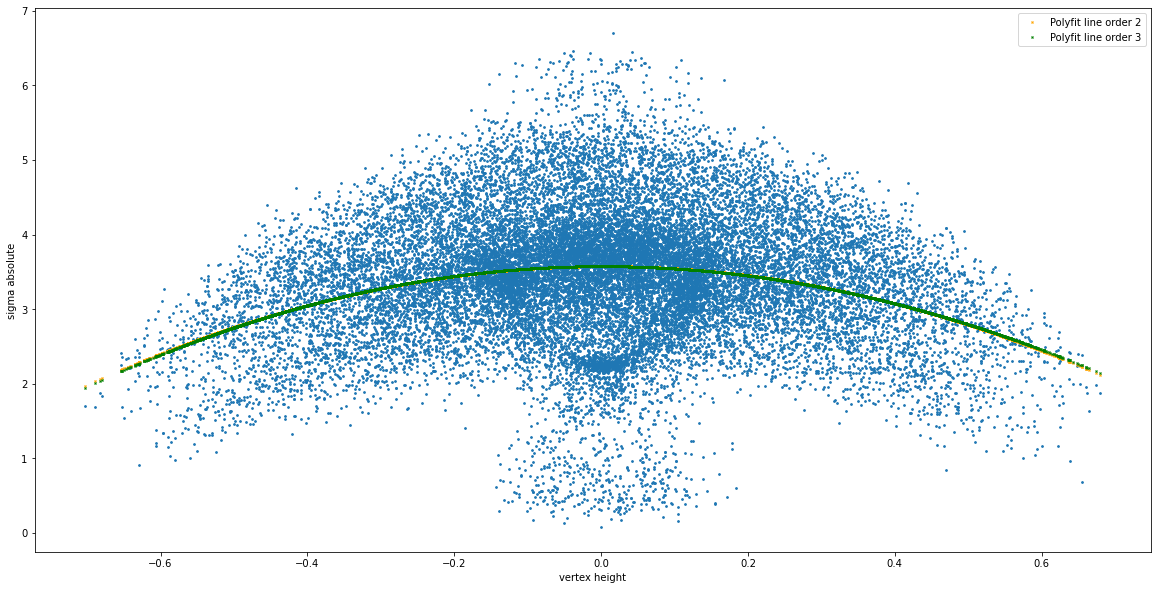

In [13]:
coeff2 = np.polyfit(positions_array[:,2], stress_mag, 2)
f2 = np.polyval(coeff2,positions_array[:,2])

coeff3 = np.polyfit(positions_array[:,2], stress_mag, 3)
f3 = np.polyval(coeff3,positions_array[:,2])

# coeff4 = np.polyfit(positions_array[:,2], stress_mag, 4)
# f4 = np.polyval(coeff4,positions_array[:,2])

#coeff5 = np.polyfit(positions_array[:,2], stress_mag, 5)
#f5 = np.polyval(coeff5,positions_array[:,2])

#plot data and polyfit
plt.figure(figsize = (20, 10))

plt.plot(positions_array[:,2], f2,'x', label='Polyfit line order 2', color='orange', markersize = 2)
plt.plot(positions_array[:,2], f3,'x', label='Polyfit line order 3', color='green', markersize =2)
#plt.plot(positions_array[:,2], f4,'x', label='Polyfit line order 4', color='green')
#plt.plot(positions_array[:,2], f5,'x', label='Polyfit line order 5', color='purple')
#plt.plot(positions_array[:,2], f4,'x', label='Polyfit line order 4', color='green')

plt.scatter(positions_array[:,2], stress_mag, s=3)
plt.xlabel('vertex height')
plt.ylabel('sigma absolute')
plt.legend()
plt.show()

In [14]:
print(coeff2)

[-3.20332794  0.03236924  3.57739596]


In [25]:
heights_sorted = np.sort(positions_array[:,2])
positive_values = np.where(heights_sorted >= 0)
heights_sorted_positive = heights_sorted[positive_values]


In [26]:
heights_sorted_positive

array([1.43664031e-05, 4.49327983e-05, 4.78666603e-05, ...,
       6.63783419e-01, 6.73594352e-01, 6.79179966e-01])

In [33]:
heights_cumulative = np.cumsum(heights_sorted_positive)
heights_cumulative_normalized = (heights_cumulative/heights_cumulative[-1])*100
index_of_90_percentile = (np.abs(heights_cumulative_normalized - 90)).argmin()
index_of_10_percentile = (np.abs(heights_cumulative_normalized - 10)).argmin()

In [35]:
height_90 = heights_sorted_positive[index_of_90_percentile]
stress_90 = np.polyval(coeff2, height_90)

height_10 = heights_sorted_positive[index_of_10_percentile]
stress_10 = np.polyval(coeff2, height_10)

print('Height at 90th percentile: ', height_90)
print('Stress at 90th percentile height: ', stress_90,'\n')

print('Height at 90th percentile: ', height_10)
print('Stress at 90th percentile height: ', stress_10)


Height at 90th percentile:  0.48767083952932
Stress at 90th percentile height:  2.8313569212776777 

Height at 90th percentile:  0.096892647284635
Stress at 90th percentile height:  3.550458866742916
